### Imports:
* ```pyopt``` - Contains functionality to train a GP and perform bayesian optimisation.

In [1]:
import pyopt

/Users/joshuahellewell/miniforge3/envs/VAE/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Create Data
* Create data object with ```Data```
* Specify number of initial sampling points with ```num_points```
* ```low_lim``` & ```up_lim``` define the bounds over which to perform function evaluations.

In [2]:
data = pyopt.Data(low_lim=0,up_lim=1,num_points=3)

### Create GP:
* ```GP``` class creates the GP object.
* ```train()``` will fit the GP to the initial data.
* ```plot_gp()``` allows visualisation of the initial function & samples.

/Users/joshuahellewell/miniforge3/envs/VAE/lib/python3.13/site-packages/pyopt/gpr.py:23: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self.gp = SingleTaskGP(self.data.x, self.data.y)


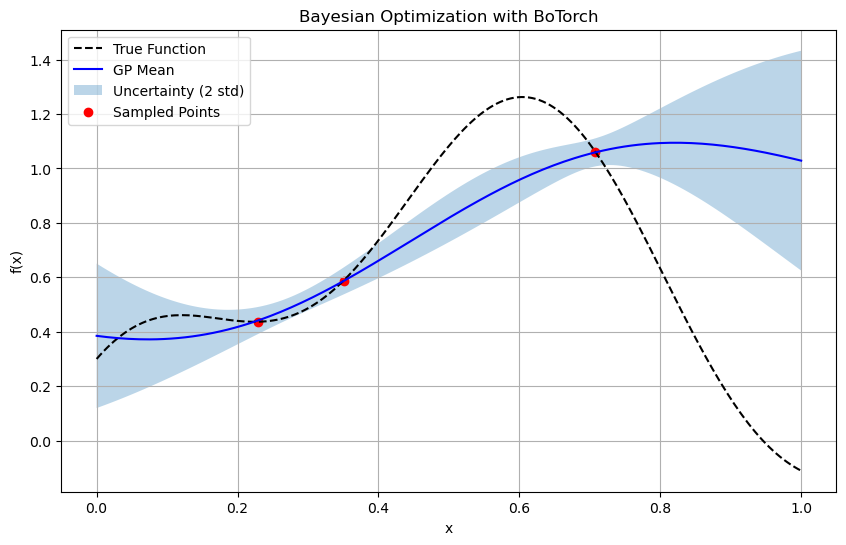

In [3]:
gp = pyopt.GP(data)
gp.train_gp()
gp.plot_gp()

### Optimise Function
* ```Optimiser``` object create the function optimiser.
* ```optimise()``` will determine the next evaluation point based on the ```UpperConfidenceBound``` acquisition function.
* The identified sample point and evaluated value will be added to the training data.
* The GP is then retrained on this new data set.
* The ```UpperConfidenceBound``` is then evaluated again.
* This continues until evaluation budget is spent, or convergence of a maxima is realised.

/Users/joshuahellewell/miniforge3/envs/VAE/lib/python3.13/site-packages/pyopt/gpr.py:23: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self.gp = SingleTaskGP(self.data.x, self.data.y)
/Users/joshuahellewell/miniforge3/envs/VAE/lib/python3.13/site-packages/botorch/fit.py:215: OptimizationWarning: `scipy_minimize` terminated with status OptimizationStatus.FAILURE, displaying original message from `scipy.optimize.minimize`: ABNORMAL: 
  result = optimizer(mll, closure=closure, **optimizer_kwargs)


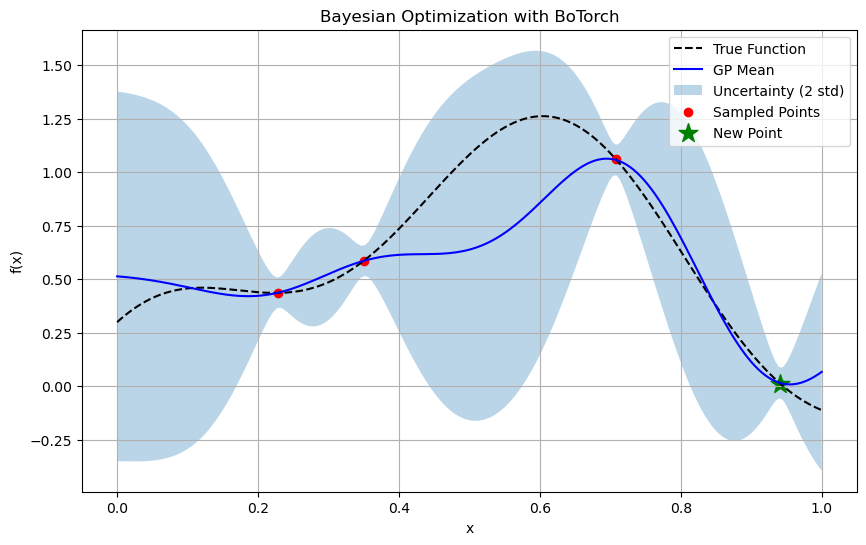

/Users/joshuahellewell/miniforge3/envs/VAE/lib/python3.13/site-packages/pyopt/gpr.py:23: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self.gp = SingleTaskGP(self.data.x, self.data.y)


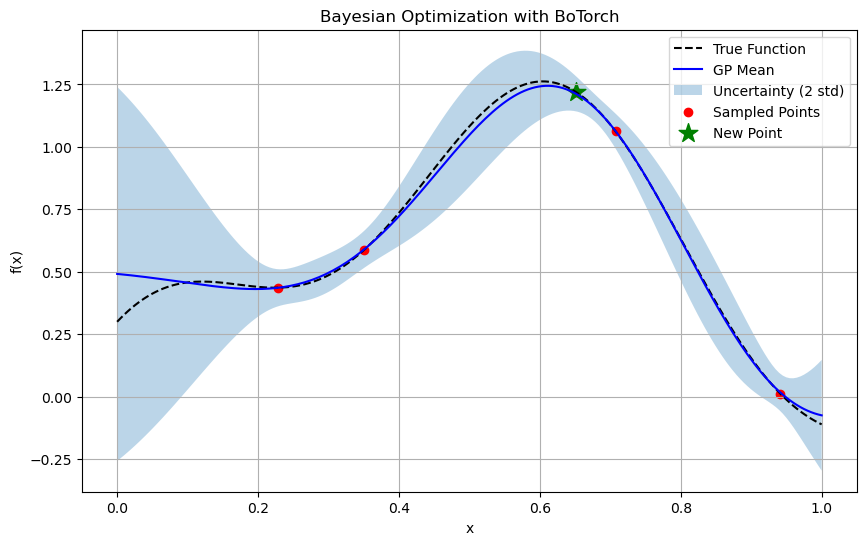

/Users/joshuahellewell/miniforge3/envs/VAE/lib/python3.13/site-packages/botorch/optim/optimize.py:677: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL: .')]
Trying again with a new set of initial conditions.
  return _optimize_acqf_batch(opt_inputs=opt_inputs)
/Users/joshuahellewell/miniforge3/envs/VAE/lib/python3.13/site-packages/pyopt/gpr.py:23: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self.gp = SingleTaskGP(self.data.x, self.data.y)


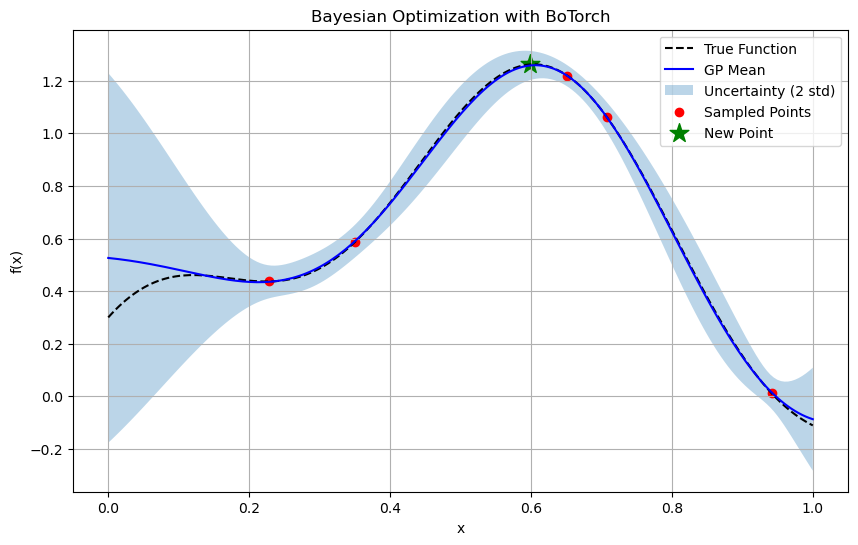

/Users/joshuahellewell/miniforge3/envs/VAE/lib/python3.13/site-packages/pyopt/gpr.py:23: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self.gp = SingleTaskGP(self.data.x, self.data.y)


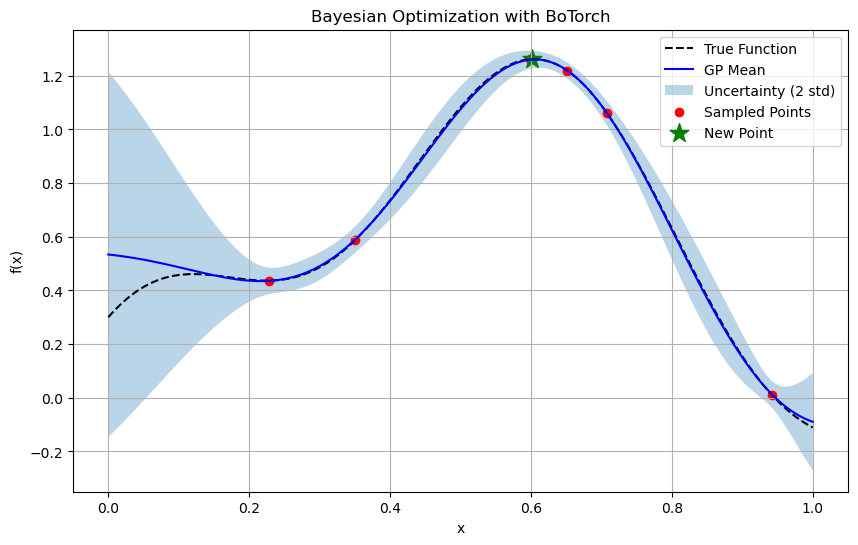

/Users/joshuahellewell/miniforge3/envs/VAE/lib/python3.13/site-packages/pyopt/gpr.py:23: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self.gp = SingleTaskGP(self.data.x, self.data.y)


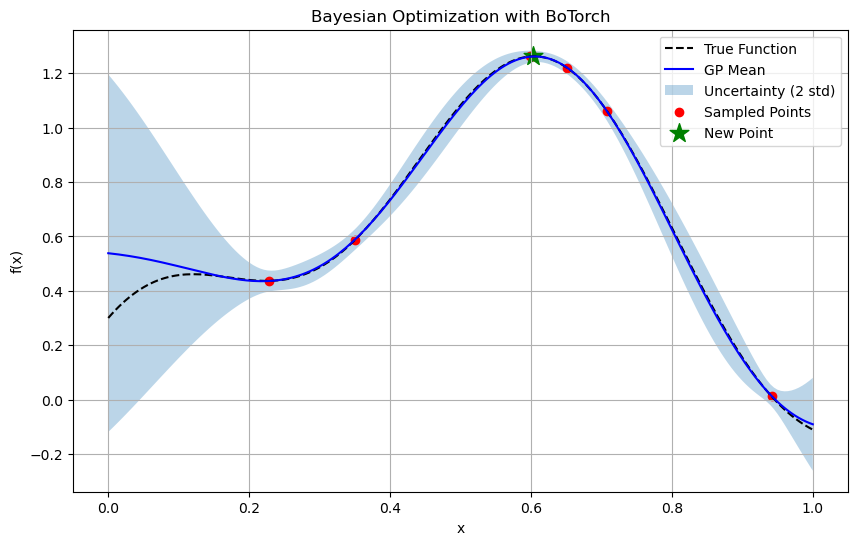

In [4]:
# optimiser = pyopt.Optimiser(gp,beta=0.5)
for i in range(0,5):
    optimiser = pyopt.Optimiser(gp,beta=0.5)
    optimiser.optimise()
    gp.train_gp()
    optimiser.visualise()